In [274]:
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score,  confusion_matrix, auc
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.special import softmax
from sklearn.cluster import SpectralClustering
from sklearn.metrics import pairwise_distances

In [275]:
columns = ['ID','Diagnosis','radius1','texture1','perimeter1','area1','smoothness1','compactness1','concavity1','concave_points1','symmetry1','fractal_dimension1','radius2','texture2',
           'perimeter2','area2','smoothness2','compactness2','concavity2','concave_points2','symmetry2','fractal_dimension2','radius3','texture3','perimeter3','area3','smoothness3',
            'compactness3','concavity3','concave_points3','symmetry3','fractal_dimension3']
wdbc = pd.read_csv('../hw8-data/wdbc.csv', names = columns)
wdbc

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [276]:
X=wdbc.iloc[:,2:]
y=wdbc.iloc[:,1]
label_encoder = LabelEncoder() 
y= label_encoder.fit_transform(y)

In [277]:
X_normed = (X - X.mean())/X.std()
X_normed = X_normed.reset_index(drop=True)

## 1. Supervised, Semi-Supervised, and Unsupervised Learning

**Monte-Carlo Simulation:**

Repeat the following procedures for supervised, unsupervised, and semi-supervised learning M = 30 times, and use randomly selected train and test data (make sure you use 20% of both the positve and negative classes as the test set). Then compare the average scores (accuracy, precision,
recall, F1-score, and AUC) that you obtain from each algorithm.


### i. Supervised Learning

In [278]:
parameters_base_l1 = {'penalty':["l1"],
                   'loss': ['squared_hinge'],
                   'dual':['auto'],
                   'max_iter':[1000],
                   'C':[0.1*n for n in range(1,11)]}

In [279]:
def find_best_param_range_l1(X_train, y_train):
    clf = LinearSVC(penalty='l1', dual="auto", random_state=0, max_iter=10000)

    grid_search = GridSearchCV(estimator=clf, 
                                param_grid=parameters_base_l1, 
                                scoring = 'accuracy', 
                                cv=5)
    
    grid_search.fit(X_train, y_train)
    results_df = pd.DataFrame(grid_search.cv_results_)[['param_C','mean_test_score']]
    results_range_df = results_df[results_df['mean_test_score']>0.8]
    print(results_range_df)

find_best_param_range_l1(X_normed, y)

  param_C  mean_test_score
0     0.1         0.973653
1     0.2         0.973669
2     0.3         0.966636
3     0.4         0.968390
4     0.5         0.973669
5     0.6         0.973669
6     0.7         0.973669
7     0.8         0.971914
8     0.9         0.971930
9     1.0         0.970175


In [280]:
best_C=0.5

In [281]:
def monteCarlo(X,y,clf):
    scores = {'accuracy':[],'precision':[],'recall':[],'f1':[],'auc':[]}

    for i in range(30):
        print(f'----------------------Iteration {i+1} ----------------------')

        X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)
        
        X_train_normed = (X_train - X_train.mean())/X_train.std()
        X_train_normed = X_train_normed.reset_index(drop=True)
        X_test_normed = (X_test - X_test.mean())/X_test.std()
        X_test_normed = X_test_normed.reset_index(drop=True)

        clf.fit(X_train_normed, y_train)
        y_pred = clf.predict(X_test_normed)

        scores['accuracy'].append(accuracy_score(y_pred, y_test))
        scores['precision'].append(precision_score(y_pred, y_test))
        scores['recall'].append(recall_score(y_pred, y_test))
        scores['f1'].append(f1_score(y_pred, y_test))
        scores['auc'].append( roc_auc_score(y_pred, y_test))

    return pd.DataFrame(scores) 


In [282]:
scores = monteCarlo(X,y,LinearSVC(penalty='l1', dual="auto", random_state=0, max_iter=100000, C=0.2, loss = 'squared_hinge'))
scores

----------------------Iteration 1 ----------------------
----------------------Iteration 2 ----------------------
----------------------Iteration 3 ----------------------
----------------------Iteration 4 ----------------------


----------------------Iteration 5 ----------------------
----------------------Iteration 6 ----------------------
----------------------Iteration 7 ----------------------
----------------------Iteration 8 ----------------------
----------------------Iteration 9 ----------------------
----------------------Iteration 10 ----------------------
----------------------Iteration 11 ----------------------
----------------------Iteration 12 ----------------------
----------------------Iteration 13 ----------------------
----------------------Iteration 14 ----------------------
----------------------Iteration 15 ----------------------
----------------------Iteration 16 ----------------------
----------------------Iteration 17 ----------------------
----------------------Iteration 18 ----------------------
----------------------Iteration 19 ----------------------
----------------------Iteration 20 ----------------------
----------------------Iteration 21 ----------------------
-------------------

,accuracy,precision,recall,f1,auc
0,0.956140,0.904762,0.974359,0.938272,0.960513
1,0.973684,0.976190,0.953488,0.964706,0.969702
2,0.947368,0.904762,0.950000,0.926829,0.947973
3,0.973684,0.928571,1.000000,0.962963,0.980000
4,0.956140,0.928571,0.951220,0.939759,0.955062
5,0.982456,0.976190,0.976190,0.976190,0.981151
6,0.982456,1.000000,0.954545,0.976744,0.977273
7,0.964912,0.904762,1.000000,0.950000,0.973684
8,0.991228,0.976190,1.000000,0.987952,0.993151
9,0.956140,0.952381,0.930233,0.941176,0.951032


In [283]:
scores.mean()

accuracy     0.971637
precision    0.949206
recall       0.973693
f1           0.960930
auc          0.972381
dtype: float64

In [284]:
print('----------------------Plot----------------------')
clf = LinearSVC(penalty='l1', dual="auto", random_state=0, max_iter=100000, C=0.2, loss = 'squared_hinge')

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

X_train_normed = (X_train - X_train.mean())/X_train.std()
X_train_normed = X_train_normed.reset_index(drop=True)
X_test_normed = (X_test - X_test.mean())/X_test.std()
X_test_normed = X_test_normed.reset_index(drop=True)

clf.fit(X_train_normed, y_train)
y_pred = clf.predict(X_test_normed)
y_score = clf.decision_function(X_test_normed)

----------------------Plot----------------------


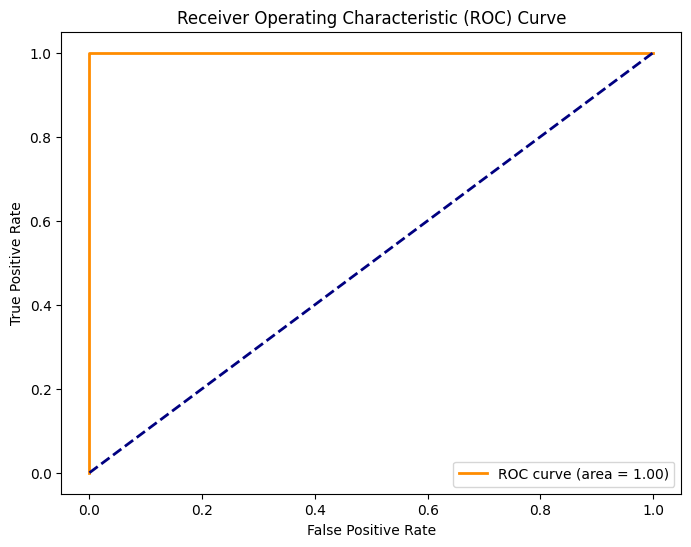

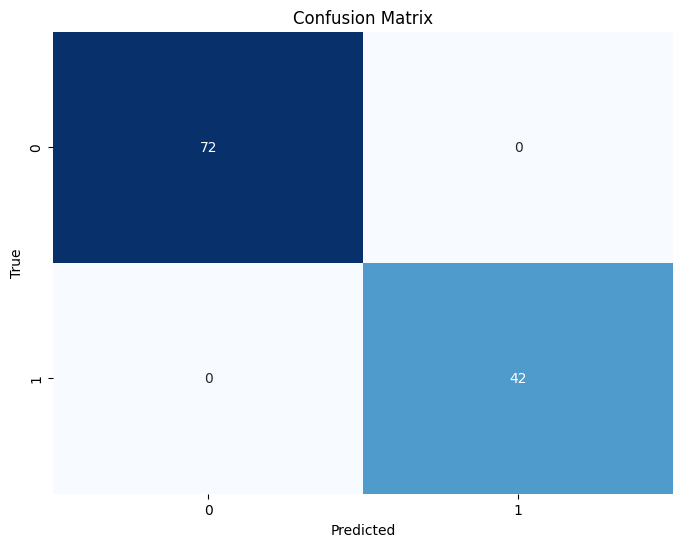

In [285]:
def plot_roc_curve(y_true, y_pred_prob):
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()


# Plot ROC curve
plot_roc_curve(y_test, y_score)

# Confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

# Plot confusion matrix for testing data
plot_confusion_matrix(y_test, y_pred)

### ii. Semi-Supervised Learning/ Self-training

In [286]:
X_label, X_unlabel, y_label, y_unlabel = train_test_split(X, y, stratify=y, test_size=0.5, random_state=1)

In [287]:
X_label_normed = (X_label - X_label.mean())/X_label.std()
X_label_normed = pd.DataFrame(X_label_normed.reset_index(drop=True), columns = X.columns)
X_label_normed

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,-0.474254,-0.551144,-0.535951,-0.501159,-0.791243,-1.214039,-1.039204,-1.085898,-2.144176,-0.828044,...,-0.613106,-0.918121,-0.681119,-0.588469,-0.994727,-1.278422,-1.170935,-1.298627,-1.563298,-1.156072
1,-0.226194,-0.655893,-0.254718,-0.299085,-1.733300,-0.592520,-0.135487,-0.551206,-1.418451,-0.625531,...,-0.429837,-0.437010,-0.466882,-0.443949,-1.341704,-0.041119,0.206823,-0.400826,-1.363178,-0.397864
2,-0.818156,-1.436957,-0.781368,-0.768998,1.812910,0.081342,-0.158185,0.130262,0.671074,0.847411,...,-0.712708,-0.788348,-0.668282,-0.700436,1.227679,-0.103114,-0.262576,0.208241,0.615102,0.429699
3,-0.341768,-0.223233,-0.332861,-0.378621,-1.574041,-0.490328,-0.612484,-0.778444,0.166222,-0.522925,...,-0.455733,-0.142646,-0.343646,-0.460719,-1.746217,-0.170581,-0.547046,-0.744350,0.407345,-0.596542
4,0.255832,1.473247,0.229605,0.159306,0.375531,-0.157403,0.367871,0.378812,-0.629620,0.239873,...,0.416787,1.219975,0.366387,0.243141,1.447284,-0.147484,0.525801,0.509730,-0.437435,0.545985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,-1.472133,-0.799354,-1.368253,-1.165559,-0.149483,0.316348,0.002942,-0.673127,-1.828643,1.183582,...,-1.395187,-1.335928,-1.284176,-1.039295,-0.665319,-0.437406,-0.573591,-1.144693,-1.968120,-0.348846
280,-0.460160,-0.273331,-0.526590,-0.472211,-1.516681,-1.424833,-1.077967,-1.110034,-1.046824,-1.486885,...,-0.537408,-0.717131,-0.614366,-0.520237,-1.762028,-1.316470,-1.240832,-1.465171,-1.080567,-1.496588
281,-0.482711,0.141111,-0.485483,-0.530107,-0.831733,-0.091352,-0.284674,-0.477112,-0.159828,-0.050395,...,-0.589201,-0.386367,-0.576996,-0.576796,-1.231901,-0.267829,-0.414323,-0.596939,-0.390078,-0.326945
282,0.554632,-1.004298,0.486011,0.393701,-0.127214,-0.383151,-0.441900,-0.122996,-0.321100,-0.555327,...,0.257423,-0.938695,0.215195,0.075274,-0.546732,-0.532831,-0.234704,-0.065709,-0.248009,-0.719086


A. Train an L1-penalized SVM to classify the labeled data Use normalized
data. Choose the penalty parameter using 5 fold cross validation

In [288]:
parameters_base_l1 = {'penalty':["l1"],
                   'loss': ['squared_hinge'],
                   'dual':['auto'],
                   'max_iter':[1000],
                   'C':[0.1*n for n in range(1,10)]}

In [289]:
find_best_param_range_l1(X_label_normed, y_label)

  param_C  mean_test_score
0     0.1         0.971805
1     0.2         0.982331
2     0.3         0.978822
3     0.4         0.982393
4     0.5         0.978885
5     0.6         0.978885
6     0.7         0.978885
7     0.8         0.978885
8     0.9         0.978885


In [290]:
clf = LinearSVC(penalty='l1', dual="auto", random_state=0, max_iter=100000, C=0.4, loss = 'squared_hinge')

B. Find the unlabeled data point that is the farthest to the decision boundary
of the SVM. Let the SVM label it (ignore its true label), and add it to
the labeled data, and retrain the SVM. Continue this process until all
unlabeled data are used. Test the final SVM on the test data andthe
average accuracy, precision, recall, F1-score, and AUC, for both training
and test sets over your M runs. Plot the ROC and report the confusion
matrix for training and testing in one of the runs.

In [291]:
clf.fit(X_label_normed, y_label)

def find_farthest_point(X_unlabel, clf):
    decision_values = clf.decision_function(X_unlabel)
    distance_to_boundary = np.abs(decision_values)
    farthest_index = np.argmax(distance_to_boundary)
    return farthest_index

In [292]:
X_unlabel_normed = (X_unlabel - X_unlabel.mean())/X_unlabel.std()
X_unlabel_normed = pd.DataFrame(X_unlabel_normed.reset_index(drop=True), columns = X.columns)

while len(X_unlabel_normed) > 0:
    farthest_index = find_farthest_point(X_unlabel_normed, clf)
    farthest_point = X_unlabel_normed.iloc[farthest_index, :]
    
    X_unlabel_normed = X_unlabel_normed.drop(index=farthest_index).reset_index(drop=True)
    X_unlabel_normed = pd.DataFrame(X_unlabel_normed, columns = X.columns)

    X_label_normed = np.vstack([X_label_normed, farthest_point])

    y_label = np.append(y_label, clf.predict([farthest_point]))
    X_label_normed=pd.DataFrame(X_label_normed,columns = X.columns)

    clf.fit(X_label_normed, y_label)

c:\Users\云忆\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(
c:\Users\云忆\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(
c:\Users\云忆\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(
c:\Users\云忆\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(
c:\Users\云忆\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.w

In [293]:
X_label_normed

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,-0.474254,-0.551144,-0.535951,-0.501159,-0.791243,-1.214039,-1.039204,-1.085898,-2.144176,-0.828044,...,-0.613106,-0.918121,-0.681119,-0.588469,-0.994727,-1.278422,-1.170935,-1.298627,-1.563298,-1.156072
1,-0.226194,-0.655893,-0.254718,-0.299085,-1.733300,-0.592520,-0.135487,-0.551206,-1.418451,-0.625531,...,-0.429837,-0.437010,-0.466882,-0.443949,-1.341704,-0.041119,0.206823,-0.400826,-1.363178,-0.397864
2,-0.818156,-1.436957,-0.781368,-0.768998,1.812910,0.081342,-0.158185,0.130262,0.671074,0.847411,...,-0.712708,-0.788348,-0.668282,-0.700436,1.227679,-0.103114,-0.262576,0.208241,0.615102,0.429699
3,-0.341768,-0.223233,-0.332861,-0.378621,-1.574041,-0.490328,-0.612484,-0.778444,0.166222,-0.522925,...,-0.455733,-0.142646,-0.343646,-0.460719,-1.746217,-0.170581,-0.547046,-0.744350,0.407345,-0.596542
4,0.255832,1.473247,0.229605,0.159306,0.375531,-0.157403,0.367871,0.378812,-0.629620,0.239873,...,0.416787,1.219975,0.366387,0.243141,1.447284,-0.147484,0.525801,0.509730,-0.437435,0.545985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.275997,-0.056659,0.236015,0.149254,-0.281429,-0.328741,-0.139145,-0.114183,-0.898668,-0.533886,...,0.314147,0.371063,0.237589,0.204310,-0.309453,-0.257385,0.138535,0.003385,-1.000309,-0.854016
565,0.435716,0.016859,0.349886,0.311932,-1.316903,-0.934094,-0.578850,-0.514000,-0.952047,-1.237352,...,0.385209,0.975146,0.302980,0.245219,-1.016374,-0.453502,-0.181497,-0.419018,-0.307882,-0.927935
566,-0.034885,-0.535712,-0.006272,-0.136220,1.032681,0.522733,0.169870,0.130598,0.424351,-0.213451,...,0.057894,-0.631280,0.060101,-0.062736,0.851294,0.517079,0.319675,0.411024,0.356916,-0.260890
567,0.689555,-0.241640,0.624172,0.540025,0.073267,-0.354937,-0.357052,0.020165,-1.150309,-1.013793,...,0.432584,-0.065684,0.343459,0.283855,0.092008,-0.538887,-0.496775,-0.329947,-0.806913,-1.140821


In [294]:
len(y_label)

569

In [295]:
scores = monteCarlo(X_label_normed, y_label ,LinearSVC(penalty='l1', dual="auto", random_state=0, max_iter=100000, C=0.2, loss = 'squared_hinge'))
scores.mean()

----------------------Iteration 1 ----------------------
----------------------Iteration 2 ----------------------
----------------------Iteration 3 ----------------------
----------------------Iteration 4 ----------------------
----------------------Iteration 5 ----------------------
----------------------Iteration 6 ----------------------
----------------------Iteration 7 ----------------------
----------------------Iteration 8 ----------------------
----------------------Iteration 9 ----------------------
----------------------Iteration 10 ----------------------
----------------------Iteration 11 ----------------------
----------------------Iteration 12 ----------------------
----------------------Iteration 13 ----------------------
----------------------Iteration 14 ----------------------
----------------------Iteration 15 ----------------------
----------------------Iteration 16 ----------------------
----------------------Iteration 17 ----------------------
----------------------I

accuracy     0.985965
precision    0.978295
recall       0.984720
f1           0.981327
auc          0.985873
dtype: float64

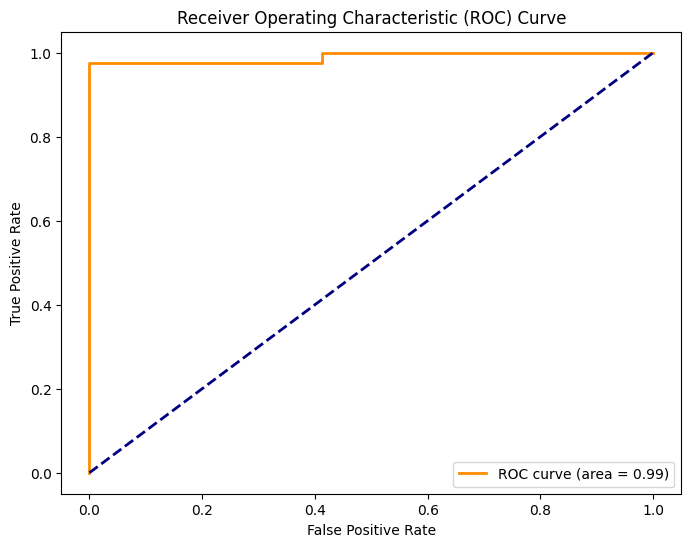

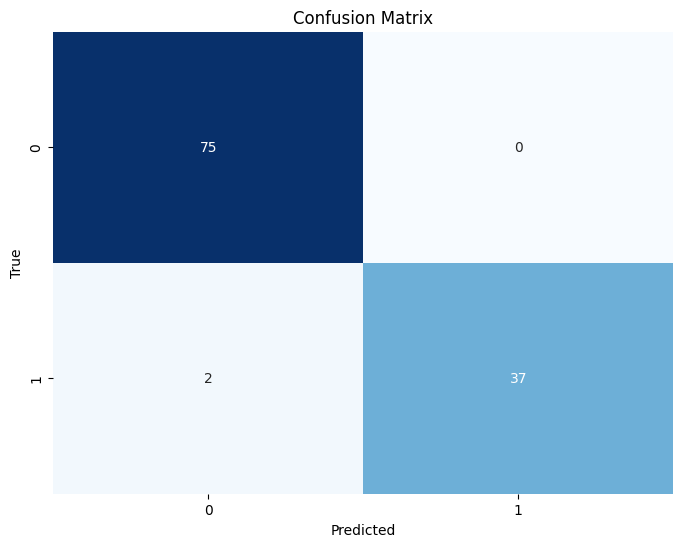

In [296]:
clf = LinearSVC(penalty='l1', dual="auto", random_state=0, max_iter=100000, C=0.2, loss = 'squared_hinge')

X_train, X_test, y_train, y_test = train_test_split(X_label_normed, y_label, stratify=y, test_size=0.2)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_score = clf.decision_function(X_test)

plot_roc_curve(y_test, y_score)
plot_confusion_matrix(y_test, y_pred)

## iii. Unsupervised Learning

Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2.


A. Run the k-means algorithm multiple times. Make sure that you initialize the algoritm randomly. How do you make sure that the algorithm was not trapped in a local minimum?

Ref: https://www.linkedin.com/advice/1/how-can-you-overcome-limitations-k-means-clustering#:~:text=To%20overcome%20local%20minima%20and,simulated%20annealing%20or%20genetic%20algorithms;
https://www.chegg.com/homework-help/questions-and-answers/question-3-1-point-saved-k-means-right-minus-wrong-correct-concerned-k-means-would-get-stu-q47049076

1.  Try to use multiple random initializations
2.  Running the algorithm multiple times with different initial centroids

In [297]:
for i in range(20):
    n_init = i*10+1
    kmeans = KMeans(n_clusters=2, n_init=n_init).fit(X_normed)
    print(f'inertia: {kmeans.inertia_}')

inertia: 11575.082807048526
inertia: 11575.082807048526
inertia: 11575.082807048526
inertia: 11575.082807048526
inertia: 11575.082807048526
inertia: 11575.082807048526
inertia: 11575.082807048526
inertia: 11575.082807048526
inertia: 11575.082807048526
inertia: 11575.082807048526
inertia: 11575.082807048526
inertia: 11575.082807048526
inertia: 11575.082807048526
inertia: 11575.082807048526
inertia: 11575.082807048526
inertia: 11575.082807048526
inertia: 11575.082807048526
inertia: 11575.082807048526
inertia: 11575.082807048526
inertia: 11575.082807048526


B. Compute the centers of the two clusters and find the closest 30 data
points to each center. Read the true labels of those 30 data points and
take a majority poll within them. The majority poll becomes the label
predicted by k-means for the members of each cluster. Then compare the
labels provided by k-means with the true labels of the training data and
report the average accuracy, precision, recall, F1-score, and AUC over M
runs, and ROC and the confusion matrix for one of the runs.

In [298]:
def evaluate_kmeans(X, y, n_clusters=2, n_runs=30):
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    auc_scores = []
    y=np.array(y)

    for _ in range(n_runs):
        kmeans = KMeans(n_clusters=n_clusters, n_init=10)
        kmeans.fit(X)

        cluster_centers = kmeans.cluster_centers_

        closest_points_indices = []
        for center in cluster_centers:
            distances = np.linalg.norm(X - center, axis=1)
            closest_points_indices.extend(np.argsort(distances)[:30])

        y_closest = y[closest_points_indices]

        cluster1_label = np.bincount(y_closest[:30]).argmax()
        cluster2_label = np.bincount(y_closest[30:]).argmax()

        y_pred = np.array([cluster1_label if label == 0 else cluster2_label for label in kmeans.labels_])

        accuracy = accuracy_score(y, y_pred)
        precision = precision_score(y, y_pred)
        recall = recall_score(y, y_pred)
        f1 = f1_score(y, y_pred)
        auc = roc_auc_score(y, kmeans.labels_)

        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)
        auc_scores.append(auc)

    avg_accuracy = np.mean(accuracies)
    avg_precision = np.mean(precisions)
    avg_recall = np.mean(recalls)
    avg_f1 = np.mean(f1_scores)
    avg_auc = np.mean(auc_scores)

    print("Average Accuracy:", avg_accuracy)
    print("Average Precision:", avg_precision)
    print("Average Recall:", avg_recall)
    print("Average F1-Score:", avg_f1)
    print("Average AUC:", avg_auc)

    kmeans = KMeans(n_clusters=2, n_init=10, random_state=0)
    kmeans.fit(X)

    y_pred_one_run = np.array([cluster1_label if label == 0 else cluster2_label for label in kmeans.labels_])

    fpr, tpr, _ = roc_curve(y, kmeans.labels_)
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y, kmeans.labels_):.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    cm = confusion_matrix(y, y_pred_one_run)
    print("Confusion Matrix:")
    print(cm)

Average Accuracy: 0.9089630931458699
Average Precision: 0.9209367443044421
Average Recall: 0.8267295597484277
Average F1-Score: 0.8712651867867276
Average AUC: 0.4477991825661081


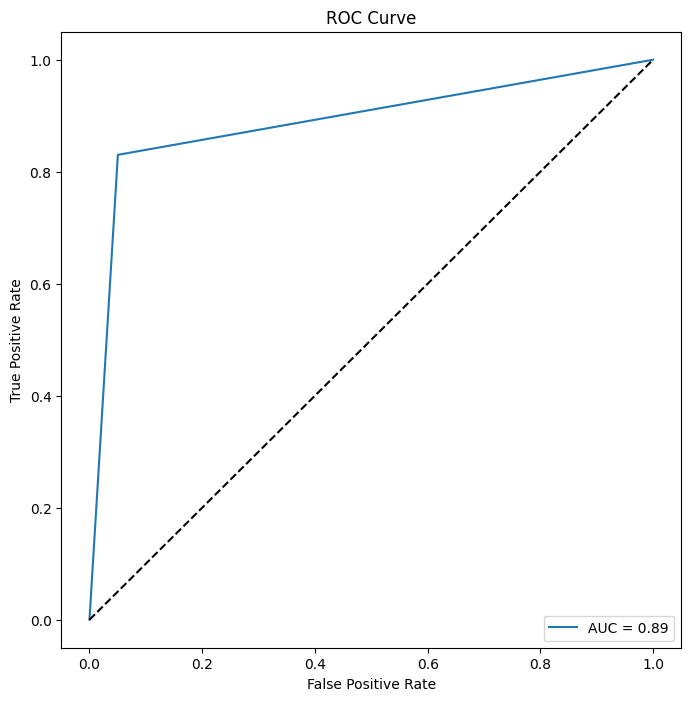

Confusion Matrix:
[[ 18 339]
 [176  36]]


In [299]:
evaluate_kmeans(X_normed, y, n_clusters=2, n_runs=30)

C. Classify test data based on their proximity to the centers of the clusters.
Report the average accuracy, precision, recall, F1-score, and AUC over
M runs, and ROC and the confusion matrix for one of the runs for the
test data.

In [300]:
def classify_test_data(X, y):
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    auc_scores = []

    for i in range(30):

        X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)
        
        X_train_normed = (X_train - X_train.mean())/X_train.std()
        X_train_normed = X_train_normed.reset_index(drop=True)
        X_test_normed = (X_test - X_test.mean())/X_test.std()
        X_test_normed = X_test_normed.reset_index(drop=True)

        kmeans = KMeans(n_clusters=2, n_init=10)
        kmeans.fit(X_train_normed)

        distances = kmeans.transform(X_test_normed)
        probabilities = softmax(-distances, axis=1)
        y_pred = np.argmax(probabilities, axis=1)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred)

        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)
        auc_scores.append(auc)

    avg_accuracy = np.mean(accuracies)
    avg_precision = np.mean(precisions)
    avg_recall = np.mean(recalls)
    avg_f1 = np.mean(f1_scores)
    avg_auc = np.mean(auc_scores)

    print("Average Accuracy:", avg_accuracy)
    print("Average Precision:", avg_precision)
    print("Average Recall:", avg_recall)
    print("Average F1-Score:", avg_f1)
    print("Average AUC:", avg_auc)

    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)
        
    X_train_normed = (X_train - X_train.mean())/X_train.std()
    X_train_normed = X_train_normed.reset_index(drop=True)
    X_test_normed = (X_test - X_test.mean())/X_test.std()
    X_test_normed = X_test_normed.reset_index(drop=True)

    kmeans = KMeans(n_clusters=2, n_init=10, random_state=0)
    kmeans.fit(X_train_normed)
    distances_one_run = kmeans.transform(X_test_normed)
    probabilities = softmax(-distances_one_run, axis=1)

    y_pred = np.argmax(probabilities, axis=1)
    
    fpr, tpr, _ = roc_curve(y_test, probabilities[:, 1])
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, probabilities[:, 1]):.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Test Data')
    plt.legend(loc='lower right')
    plt.show()

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

Average Accuracy: 0.6330409356725146
Average Precision: 0.6420227554451294
Average Recall: 0.6071428571428571
Average F1-Score: 0.6187927478642449
Average AUC: 0.6276455026455027


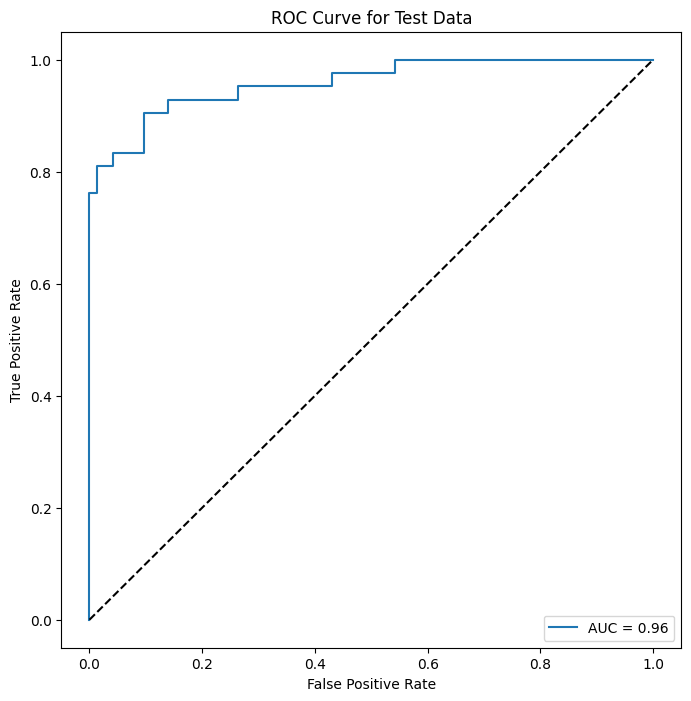

Confusion Matrix:
[[65  7]
 [ 7 35]]


In [301]:
classify_test_data(X, y)

### iv. Spectral Clustering

Repeat 1(b)iii using spectral clustering, which is clustering based on kernels.3 Research what spectral clustering is. Use RBF
kernel with gamma=1 or find a gamma for which the two clutsres have the
same balance as the one in original data set (if the positive class has p and the
negative class has n samples, the two clusters must have p and n members).
Do not label data based on their proximity to cluster center, because spectral
clustering may give you non-convex clusters . Instead, use fit − predict
method.

Ref: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html

In [330]:
def evaluate_Spectralspectral(X, y):
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    auc_scores = []
    y=np.array(y)
    

    for _ in range(30):
        spectral = SpectralClustering(n_clusters=2, assign_labels='discretize', affinity='rbf', gamma=1.0)
        labels = spectral.fit_predict(X)

        cluster_labels = []
        for cluster_idx in range(2):
            cluster_mask = labels == cluster_idx
            true_labels_in_cluster = y[cluster_mask]

            majority_label = np.bincount(true_labels_in_cluster).argmax()
            cluster_labels.append(majority_label)

        y_pred = np.array([cluster_labels[0] if label == 0 else cluster_labels[1] for label in spectral.labels_])

        accuracy = accuracy_score(y, y_pred)
        precision = precision_score(y, y_pred, zero_division=0)
        recall = recall_score(y, y_pred)
        f1 = f1_score(y, y_pred)
        auc = roc_auc_score(y, spectral.labels_)

        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)
        auc_scores.append(auc)

    avg_accuracy = np.mean(accuracies)
    avg_precision = np.mean(precisions)
    avg_recall = np.mean(recalls)
    avg_f1 = np.mean(f1_scores)
    avg_auc = np.mean(auc_scores)

    print("Average Accuracy:", avg_accuracy)
    print("Average Precision:", avg_precision)
    print("Average Recall:", avg_recall)
    print("Average F1-Score:", avg_f1)
    print("Average AUC:", avg_auc)


    #For one run

    spectral = SpectralClustering(n_clusters=2, assign_labels='discretize', affinity='rbf', gamma=1.0, random_state=100)
    labels = spectral.fit_predict(X)

    decision_values = spectral.affinity_matrix_
    probabilities = np.exp(decision_values) / np.sum(np.exp(decision_values), axis=1, keepdims=True)

    fpr, tpr, thresholds = roc_curve(y, probabilities[:, 1])
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y, labels):.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Confusion Matrix for one run
    cm = confusion_matrix(y, labels)
    print("Confusion Matrix:")
    print(cm)


Average Accuracy: 0.6298769771528999
Average Precision: 0.6611111111111112
Average Recall: 0.00880503144654088
Average F1-Score: 0.017358800342444435
Average AUC: 0.501394834663425


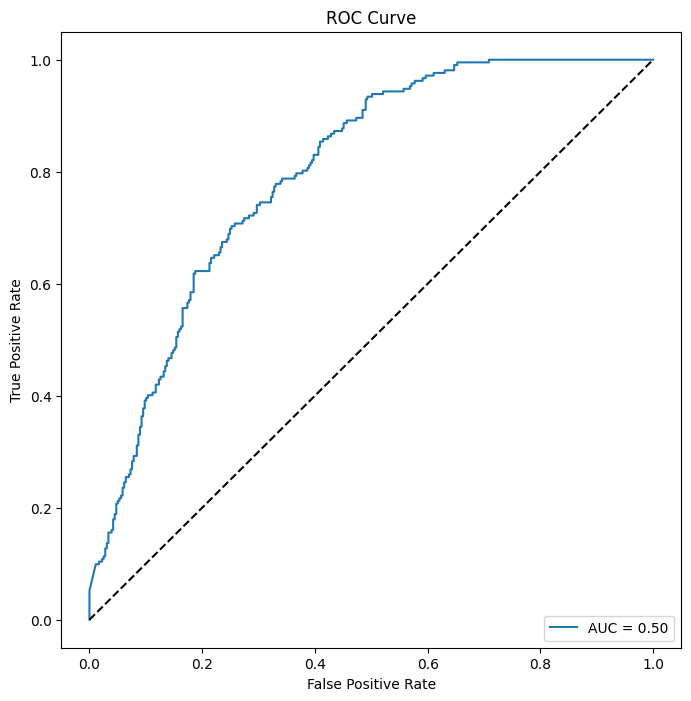

Confusion Matrix:
[[356   1]
 [210   2]]


In [331]:
evaluate_Spectralspectral(X_normed, y)

v. One can expect that supervised learning on the full data set works better than
semi-supervised learning with half of the data set labeled.One can expect that
unsupervised learning underperforms in such situations. Compare the results
you obtained by those methods.


In this project, supervise learning and semi-supervise learning both gave good performance. Unsupervise model's result is not ideal.

## 2. Active Learning Using Support Vector Machine

In [304]:
columns_name = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
banknote=pd.read_csv('../hw8-data/data_banknote_authentication.csv', names=columns_name)
test_data = banknote.sample(n=472, random_state=42)
train_data = banknote.drop(test_data.index)

test_data_X = test_data.iloc[:,:-1]
test_data_y = test_data.iloc[:,-1]

(b) Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure.


### Passive Learning

i. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the penalty parameter using 5-fold cross validation.4 Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. 

Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning.

In [305]:
select_10_train = train_data.sample(n=10, random_state=100)
train_data = train_data.drop(select_10_train.index)

select_10_train_X = select_10_train.iloc[:,:-1]
select_10_train_y = select_10_train.iloc[:,-1]
select_10_train_y

675     0
1205    1
1050    1
27      0
744     0
393     0
57      0
983     1
926     1
702     0
Name: class, dtype: int64

In [306]:
parameters_base_l1 = {'penalty':["l1"],
                   'loss': ['squared_hinge'],
                   'dual':['auto'],
                   'max_iter':[10000],
                   'C':[10**n for n in range(-3,4)]}

In [307]:
clf = LinearSVC(penalty='l1', dual="auto", random_state=0)

grid_search = GridSearchCV(estimator=clf, 
                            param_grid=parameters_base_l1, 
                            scoring = 'accuracy', 
                            cv=5)
grid_search.fit(select_10_train_X, select_10_train_y)
results_df = pd.DataFrame(grid_search.cv_results_)[['param_C','mean_test_score']]
results_range_df = results_df[results_df['mean_test_score']>0.5]
print(results_range_df)

c:\Users\云忆\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


  param_C  mean_test_score
0   0.001              0.6
1    0.01              0.6
2     0.1              0.7
3       1              0.7
4      10              0.7
5     100              0.7
6    1000              0.7


C=1

In [308]:
df_error = pd.DataFrame(np.zeros((90, 50)), columns=[f"Iteration_{i}" for i in range(1, 51)])

for i in range(50):
    print(f'----- Iteration {i} running -----')

    test_data = banknote.sample(n=472)
    train_data = banknote.drop(test_data.index)

    test_data_X = test_data.iloc[:,:-1]
    test_data_y = test_data.iloc[:,-1]

    select_10_train = train_data.sample(n=10)
    train_data = train_data.drop(select_10_train.index)

    data_volume = len(select_10_train)

    select_10_train_X = select_10_train.iloc[:,:-1]
    select_10_train_y = select_10_train.iloc[:,-1]

    lsvc = LinearSVC(penalty='l1', 
                loss= 'squared_hinge',
                dual='auto',
                max_iter=10000,
                C=1)
    
    lsvc.fit(select_10_train_X, select_10_train_y)
    y_pred = lsvc.predict(test_data_X)
    error = 1-accuracy_score(test_data_y, y_pred)
    cc=0
    df_error.iloc[cc,i] = round(error,6)
    
    print(f'Training Data: {len(select_10_train)} ---> Missclassification: {error}')
    
    while len(train_data)>0:
        
        new_10_train = train_data.sample(n=10)
        train_data = train_data.drop(new_10_train.index)
        select_10_train = pd.concat([new_10_train,select_10_train])

        data_volume = len(select_10_train)

        select_10_train_X = select_10_train.iloc[:,:-1]
        select_10_train_y = select_10_train.iloc[:,-1]

        lsvc = LinearSVC(penalty='l1', 
                    loss= 'squared_hinge',
                    dual='auto',
                    max_iter=10000,
                    C=1)
        
        lsvc.fit(select_10_train_X, select_10_train_y)
        y_pred = lsvc.predict(test_data_X)
        error = 1-accuracy_score(test_data_y, y_pred)
        
        cc+=1
        df_error.iloc[cc,i] = round(error,6)
        
        print(f'Training Data: {len(select_10_train)} ---> Missclassification: {error}')

    

----- Iteration 0 running -----
Training Data: 10 ---> Missclassification: 0.014830508474576232
Training Data: 20 ---> Missclassification: 0.025423728813559365
Training Data: 30 ---> Missclassification: 0.025423728813559365
Training Data: 40 ---> Missclassification: 0.025423728813559365
Training Data: 50 ---> Missclassification: 0.014830508474576232
Training Data: 60 ---> Missclassification: 0.010593220338983023
Training Data: 70 ---> Missclassification: 0.008474576271186418
Training Data: 80 ---> Missclassification: 0.008474576271186418
Training Data: 90 ---> Missclassification: 0.008474576271186418
Training Data: 100 ---> Missclassification: 0.008474576271186418
Training Data: 110 ---> Missclassification: 0.008474576271186418
Training Data: 120 ---> Missclassification: 0.008474576271186418
Training Data: 130 ---> Missclassification: 0.010593220338983023
Training Data: 140 ---> Missclassification: 0.010593220338983023
Training Data: 150 ---> Missclassification: 0.010593220338983023
Tr

In [309]:
df_error

,Iteration_1,Iteration_2,Iteration_3,Iteration_4,Iteration_5,Iteration_6,Iteration_7,Iteration_8,Iteration_9,Iteration_10,...,Iteration_41,Iteration_42,Iteration_43,Iteration_44,Iteration_45,Iteration_46,Iteration_47,Iteration_48,Iteration_49,Iteration_50
0,0.014831,0.118644,0.205508,0.021186,0.025424,0.082627,0.108051,0.097458,0.105932,0.114407,...,0.103814,0.021186,0.097458,0.067797,0.074153,0.042373,0.197034,0.118644,0.120763,0.046610
1,0.025424,0.029661,0.201271,0.019068,0.012712,0.080508,0.012712,0.148305,0.027542,0.076271,...,0.014831,0.099576,0.014831,0.042373,0.084746,0.031780,0.004237,0.006356,0.016949,0.033898
2,0.025424,0.029661,0.074153,0.019068,0.025424,0.082627,0.027542,0.118644,0.025424,0.019068,...,0.014831,0.108051,0.012712,0.010593,0.091102,0.025424,0.008475,0.059322,0.016949,0.023305
3,0.025424,0.019068,0.027542,0.012712,0.025424,0.016949,0.042373,0.040254,0.038136,0.023305,...,0.014831,0.097458,0.014831,0.014831,0.065678,0.014831,0.008475,0.031780,0.036017,0.031780
4,0.014831,0.014831,0.027542,0.012712,0.008475,0.016949,0.021186,0.033898,0.023305,0.023305,...,0.012712,0.095339,0.014831,0.014831,0.038136,0.008475,0.008475,0.031780,0.019068,0.031780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.008475,0.006356,0.010593,0.006356,0.016949,0.010593,0.012712,0.010593,0.014831,0.010593,...,0.012712,0.016949,0.012712,0.010593,0.010593,0.008475,0.010593,0.006356,0.008475,0.010593
86,0.008475,0.004237,0.010593,0.006356,0.016949,0.010593,0.012712,0.010593,0.014831,0.008475,...,0.012712,0.016949,0.012712,0.010593,0.012712,0.008475,0.010593,0.006356,0.008475,0.010593
87,0.008475,0.004237,0.010593,0.006356,0.016949,0.010593,0.012712,0.010593,0.014831,0.008475,...,0.012712,0.016949,0.012712,0.010593,0.012712,0.008475,0.010593,0.006356,0.008475,0.010593
88,0.010593,0.004237,0.010593,0.006356,0.016949,0.010593,0.012712,0.010593,0.014831,0.008475,...,0.012712,0.016949,0.012712,0.010593,0.012712,0.008475,0.010593,0.006356,0.008475,0.010593


### Active Learning

ii. Train a SVM with a pool of 10 randomly selected data points from the training
set5 using linear kernel and L1 penalty. Select the parameters of the SVM
with 5-fold cross validation. Choose the 10 closest data points in the training
set to the hyperplane of the SVM6 and add them to the pool. Do not replace
the samples back into the training set. Train a new SVM using the pool.
Repeat this process until all training data is used. You will have 90 SVMs
that were trained using 10, 20, 30,..., 900 data points and their 90 test errors.
You have implemented active learning.


In [310]:
columns_name = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
banknote=pd.read_csv('../hw8-data/data_banknote_authentication.csv', names=columns_name)
test_data = banknote.sample(n=472, random_state=42)
train_data = banknote.drop(test_data.index)

test_data_X = test_data.iloc[:,:-1]
test_data_y = test_data.iloc[:,-1]

train_data_X = train_data.iloc[:,:-1]
train_data_y = train_data.iloc[:,-1]

select_10_train = train_data.sample(n=10, random_state=0)
train_data = train_data.drop(select_10_train.index)

select_10_train_X = select_10_train.iloc[:,:-1]
select_10_train_y = select_10_train.iloc[:,-1]
print(select_10_train_y)

parameters_base_l1 = {'penalty':["l1"],
                   'loss': ['squared_hinge'],
                   'dual':['auto'],
                   'max_iter':[10000],
                   'C':[10**n for n in range(-3,4)]}

clf = LinearSVC(penalty='l1', dual="auto", random_state=0)

grid_search = GridSearchCV(estimator=clf, 
                            param_grid=parameters_base_l1, 
                            scoring = 'accuracy', 
                            cv=5)
grid_search.fit(select_10_train_X, select_10_train_y)
results_df = pd.DataFrame(grid_search.cv_results_)[['param_C','mean_test_score']]
results_range_df = results_df[results_df['mean_test_score']>0.5]
print(results_range_df)

758     0
195     0
637     0
37      0
876     1
911     1
1332    1
623     0
633     0
412     0
Name: class, dtype: int64


c:\Users\云忆\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


  param_C  mean_test_score
0   0.001              0.7
1    0.01              0.7
2     0.1              0.6
3       1              0.7
4      10              0.7
5     100              0.7
6    1000              0.7


C=1

In [311]:
df_error_2 = pd.DataFrame(np.zeros((90, 50)), columns=[f"Iteration_{i}" for i in range(1, 51)])

for i in range(50):
    print(f'----- Iteration {i} running -----')
    test_data = banknote.sample(n=472)
    train_data = banknote.drop(test_data.index)

    test_data_X = test_data.iloc[:,:-1]
    test_data_y = test_data.iloc[:,-1]

    select_10_train = train_data.sample(n=10)
    train_data = train_data.drop(select_10_train.index)

    cc = 0

    select_10_train_X = select_10_train.iloc[:,:-1]
    select_10_train_y = select_10_train.iloc[:,-1]

    lsvc = LinearSVC(penalty='l1', 
                loss= 'squared_hinge',
                dual='auto',
                max_iter=10000,
                C=1)
    
    lsvc.fit(select_10_train_X, select_10_train_y)
    y_pred = lsvc.predict(test_data_X)
    error = 1-accuracy_score(test_data_y, y_pred)
    df_error_2.iloc[cc,i] = round(error,6)
    print(f'Training Data: {len(select_10_train)} ---> Missclassification: {error}')

    while len(train_data)>0:

        train_data_X = train_data.iloc[:,:-1]
        train_distance = lsvc.decision_function(train_data_X)

        if len(train_data)>10:
            add_train_index = np.argpartition(train_distance, 10)[:10]
            new_10_train = train_data.iloc[add_train_index]
        else:
            new_10_train = train_data

        train_data = train_data.drop(new_10_train.index)
        select_10_train = pd.concat([new_10_train,select_10_train])

        

        select_10_train_X = select_10_train.iloc[:,:-1]
        select_10_train_y = select_10_train.iloc[:,-1]

        lsvc = LinearSVC(penalty='l1', 
                    loss= 'squared_hinge',
                    dual='auto',
                    max_iter=10000,
                    C=1)
        
        lsvc.fit(select_10_train_X, select_10_train_y)
        y_pred = lsvc.predict(test_data_X)
        error = 1-accuracy_score(test_data_y, y_pred)

        cc+=1
        df_error_2.iloc[cc,i] = round(error,6)

        data_volume = len(select_10_train)
        print(f'Training Data: {len(select_10_train)} ---> Missclassification: {error}')


----- Iteration 0 running -----
Training Data: 10 ---> Missclassification: 0.05720338983050843
Training Data: 20 ---> Missclassification: 0.05720338983050843
Training Data: 30 ---> Missclassification: 0.05720338983050843
Training Data: 40 ---> Missclassification: 0.05720338983050843
Training Data: 50 ---> Missclassification: 0.05720338983050843
Training Data: 60 ---> Missclassification: 0.05720338983050843
Training Data: 70 ---> Missclassification: 0.05720338983050843
Training Data: 80 ---> Missclassification: 0.05720338983050843
Training Data: 90 ---> Missclassification: 0.05720338983050843
Training Data: 100 ---> Missclassification: 0.05720338983050843
Training Data: 110 ---> Missclassification: 0.05720338983050843
Training Data: 120 ---> Missclassification: 0.05720338983050843
Training Data: 130 ---> Missclassification: 0.05720338983050843
Training Data: 140 ---> Missclassification: 0.05720338983050843
Training Data: 150 ---> Missclassification: 0.05720338983050843
Training Data: 16

In [312]:
df_error_2

,Iteration_1,Iteration_2,Iteration_3,Iteration_4,Iteration_5,Iteration_6,Iteration_7,Iteration_8,Iteration_9,Iteration_10,...,Iteration_41,Iteration_42,Iteration_43,Iteration_44,Iteration_45,Iteration_46,Iteration_47,Iteration_48,Iteration_49,Iteration_50
0,0.057203,0.158898,0.103814,0.120763,0.088983,0.031780,0.152542,0.188559,0.218220,0.137712,...,0.080508,0.163136,0.033898,0.091102,0.152542,0.114407,0.059322,0.095339,0.093220,0.084746
1,0.057203,0.158898,0.103814,0.120763,0.088983,0.031780,0.152542,0.188559,0.156780,0.137712,...,0.080508,0.163136,0.033898,0.091102,0.152542,0.114407,0.059322,0.095339,0.093220,0.084746
2,0.057203,0.156780,0.103814,0.120763,0.088983,0.031780,0.152542,0.188559,0.156780,0.137712,...,0.080508,0.163136,0.033898,0.091102,0.152542,0.114407,0.059322,0.095339,0.093220,0.084746
3,0.057203,0.158898,0.103814,0.120763,0.088983,0.031780,0.152542,0.188559,0.156780,0.137712,...,0.080508,0.163136,0.033898,0.091102,0.152542,0.114407,0.059322,0.095339,0.093220,0.084746
4,0.057203,0.158898,0.103814,0.120763,0.088983,0.031780,0.152542,0.188559,0.156780,0.137712,...,0.080508,0.163136,0.033898,0.088983,0.152542,0.114407,0.059322,0.095339,0.093220,0.084746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.012712,0.012712,0.012712,0.008475,0.008475,0.004237,0.014831,0.016949,0.004237,0.012712,...,0.012712,0.008475,0.008475,0.002119,0.006356,0.012712,0.006356,0.012712,0.008475,0.008475
86,0.012712,0.012712,0.012712,0.008475,0.008475,0.004237,0.014831,0.016949,0.004237,0.012712,...,0.012712,0.008475,0.008475,0.002119,0.006356,0.014831,0.006356,0.012712,0.008475,0.008475
87,0.012712,0.012712,0.012712,0.008475,0.008475,0.004237,0.014831,0.016949,0.004237,0.012712,...,0.012712,0.008475,0.010593,0.002119,0.006356,0.012712,0.006356,0.012712,0.008475,0.008475
88,0.012712,0.012712,0.012712,0.008475,0.008475,0.004237,0.014831,0.016949,0.004237,0.012712,...,0.012712,0.008475,0.008475,0.002119,0.006356,0.012712,0.006356,0.012712,0.008475,0.008475


(c) Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i
and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot
average test error versus number of training instances for both active and passive
learners on the same figure and report your conclusions. Here, you are actually
obtaining a learning curve by Monte-Carlo simulation.

In [313]:
passive_mean = df_error.mean(axis=1)
active_mean = df_error_2.mean(axis=1)

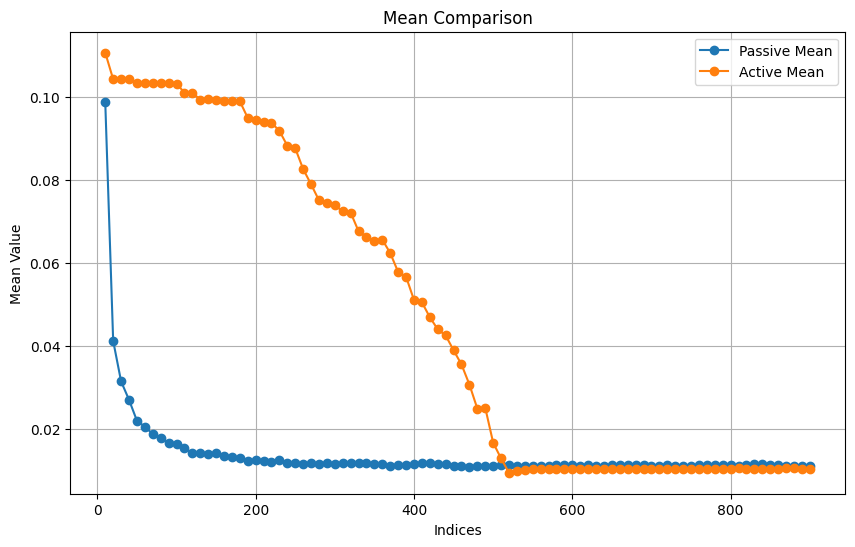

In [334]:
indices = range(1, len(passive_mean) + 1)
real_indices = [x * 10 for x in x_values]

plt.figure(figsize=(10, 6))

plt.plot(real_indices, passive_mean, label='Passive Mean', marker='o')
plt.plot(real_indices, active_mean, label='Active Mean', marker='o')

plt.title('Mean Comparison')
plt.xlabel('Indices')
plt.ylabel('Mean Value')

plt.legend()
plt.grid(True)
plt.show()

From the plot, I found that the two results between two active learning are close. And the passive learning's learning rate is more smooth. After around 500 selected training data, the performance of two learning method is similiar.